<a href="https://colab.research.google.com/github/ayushic2899/Tweet_Sentiment_Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/sentiment_TCS.csv")

In [4]:
data.head()

,polarity,tweet,dates
0,0.000,RT sachinv1125 Plz PM Modi ji reschedule exam ...,04-03-2021
1,0.475,What a great time and great job by you Sean al...,04-03-2021
2,0.000,please continue wfh TCS,04-03-2021
3,0.500,While India Inc is jumping to cover vaccinatio...,04-03-2021
4,0.600,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,04-03-2021


In [5]:
 data['polarity'].unique()

array([ 0.00000000e+00,  4.75000000e-01,  5.00000000e-01,  6.00000000e-01,
        2.00000000e-01, -5.00000000e-01,  4.50000000e-01, -1.00000000e-01,
        1.00000000e-01, -1.12500000e-01,  2.25000000e-01,  3.33333333e-01,
       -4.00000000e-01, -8.54166667e-02,  9.91161616e-02, -3.00000000e-01,
        1.36363636e-01,  6.66666667e-02,  1.00000000e+00, -1.66666667e-01,
        2.50000000e-01, -5.20000000e-01, -7.50000000e-01,  5.33333333e-01,
        8.00000000e-01, -7.50000000e-02, -6.00000000e-01,  2.66666667e-01,
        5.00000000e-02,  3.00000000e-01,  3.18181818e-01,  1.42857143e-01,
        7.00000000e-01, -8.33333333e-02,  1.50000000e-01,  1.58333333e-01,
       -5.00000000e-02,  1.80000000e-01, -1.87500000e-01, -4.04761905e-01,
        4.00000000e-01,  2.20000000e-01,  5.75000000e-01,  6.33333333e-01,
        6.00000000e-01,  2.54166667e-01,  3.87500000e-01,  1.57142857e-01,
       -2.91666667e-02,  1.81818182e-02,  2.75000000e-01, -1.07142857e-01,
        1.11111111e-02,  

In [6]:
 data['dates'].unique()

array(['04-03-2021', '05-03-2021', '06-03-2021', '07-03-2021',
       '08-03-2021', '09-03-2021', '10-03-2021'], dtype=object)

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [8]:
#using Stopwords import from nltk library
import nltk
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#performing stemming and porter stemmer for stemming purpos so that process of removing prefixes and suffixes from words so that they are reduced to simpler forms
def process_tweets(tweet):
    tweet = tweet.lower()
    tweet =  re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r'\@\w+|\#',"",tweet)
    tokens = word_tokenize(tweet)
    final_tokens = [w for w in tokens if w not in stopword]
    porter = PorterStemmer()
    final_words = [porter.stem(w) for w in final_tokens]
    
    return ' '.join(final_words)

In [11]:
data.head()

,polarity,tweet,dates
0,0.000,RT sachinv1125 Plz PM Modi ji reschedule exam ...,04-03-2021
1,0.475,What a great time and great job by you Sean al...,04-03-2021
2,0.000,please continue wfh TCS,04-03-2021
3,0.500,While India Inc is jumping to cover vaccinatio...,04-03-2021
4,0.600,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,04-03-2021


In [29]:
def getSentiment(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [31]:
data['Sentiment']=data['polarity'].apply(getSentiment)

In [32]:
data.head()

,polarity,tweet,dates,Sentiment
0,0.000,RT sachinv1125 Plz PM Modi ji reschedule exam ...,04-03-2021,Neutral
1,0.475,What a great time and great job by you Sean al...,04-03-2021,Positive
2,0.000,please continue wfh TCS,04-03-2021,Neutral
3,0.500,While India Inc is jumping to cover vaccinatio...,04-03-2021,Positive
4,0.600,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,04-03-2021,Positive


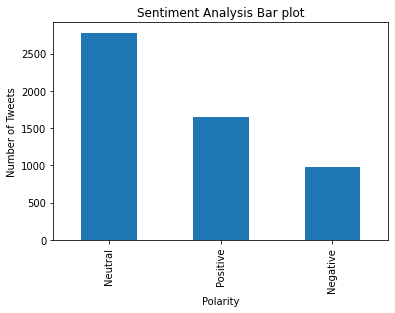

In [39]:
#Create a bar chart to show the count of positive,Neutral,and negative sentiments
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.show()

In [51]:
data['Sentiment'].value_counts()

Neutral     2778
Positive    1650
Negative     983
Name: Sentiment, dtype: int64

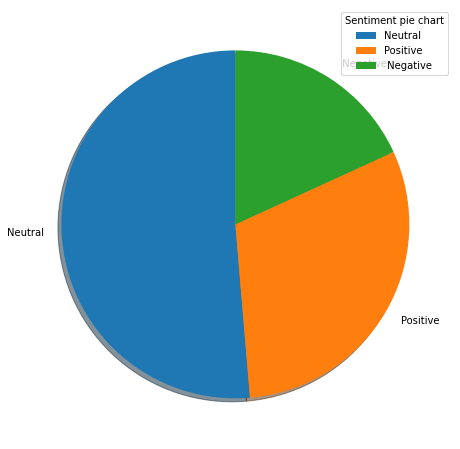

In [68]:
#pie chart for Sentiments
import numpy as np
plt.figure(figsize=(, 7))
y = np.array([2778,1650,983])
mylabel = ["Neutral","Positive"," Negative"]
plt.pie(y, labels = mylabel, startangle = 90,shadow = True)
plt.legend(title = "Sentiment pie chart")
plt.show() 

In [75]:
df= data.drop(columns = ['tweet'])

In [77]:
df.head()

,polarity,dates,Sentiment
0,0.000,04-03-2021,Neutral
1,0.475,04-03-2021,Positive
2,0.000,04-03-2021,Neutral
3,0.500,04-03-2021,Positive
4,0.600,04-03-2021,Positive


In [78]:
df.groupby('dates').count()

,polarity,Sentiment
dates,,
04-03-2021,859,859
05-03-2021,859,859
06-03-2021,859,859
07-03-2021,861,861
08-03-2021,794,794
09-03-2021,661,661
10-03-2021,518,518


In [81]:
## sentiment category values with respect to their dates
df2=pd.pivot_table(df,index=['dates'],columns=['Sentiment'],values=['Sentiment'],aggfunc='count')
df2

polarity                 
Sentiment  Negative Neutral Positive
dates                               
04-03-2021      159     426      274
05-03-2021      159     426      274
06-03-2021      159     426      274
07-03-2021      159     426      276
08-03-2021      139     408      247
09-03-2021      114     364      183
10-03-2021       94     302      122

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


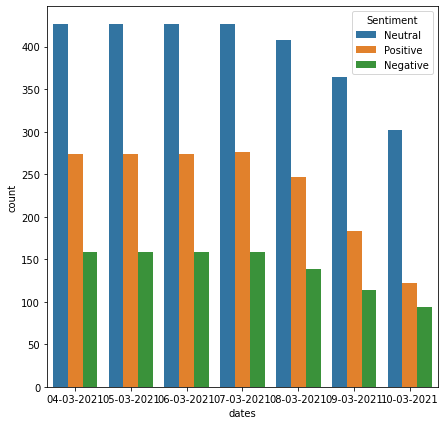

In [99]:
#count plot between dates and Sentiments
plt.figure(figsize=(7, 7))
sns.countplot('dates',hue='Sentiment' ,data=df)